## Importing Packages

In [ ]:
!pip install pandas

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/ofa ai mastery program computer vision'
#mengambil dataset yang disimpan pada google drive

## Data Visualization

In [ ]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'): # mengambil foto pada folder "train" pada dataset
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names  # Mengkategorikan class hewan pada dataset
data['Number of samples']+=nums  # Menampilkan jumlah foto sesuai class

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,cat,700
1,dog,900
2,deer,600
3,horse,600


<Axes: xlabel='Name of class', ylabel='Number of samples'>

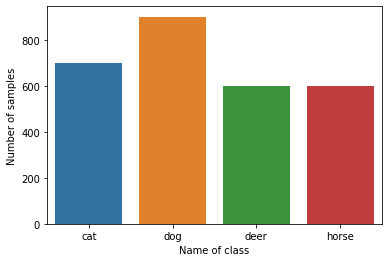

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

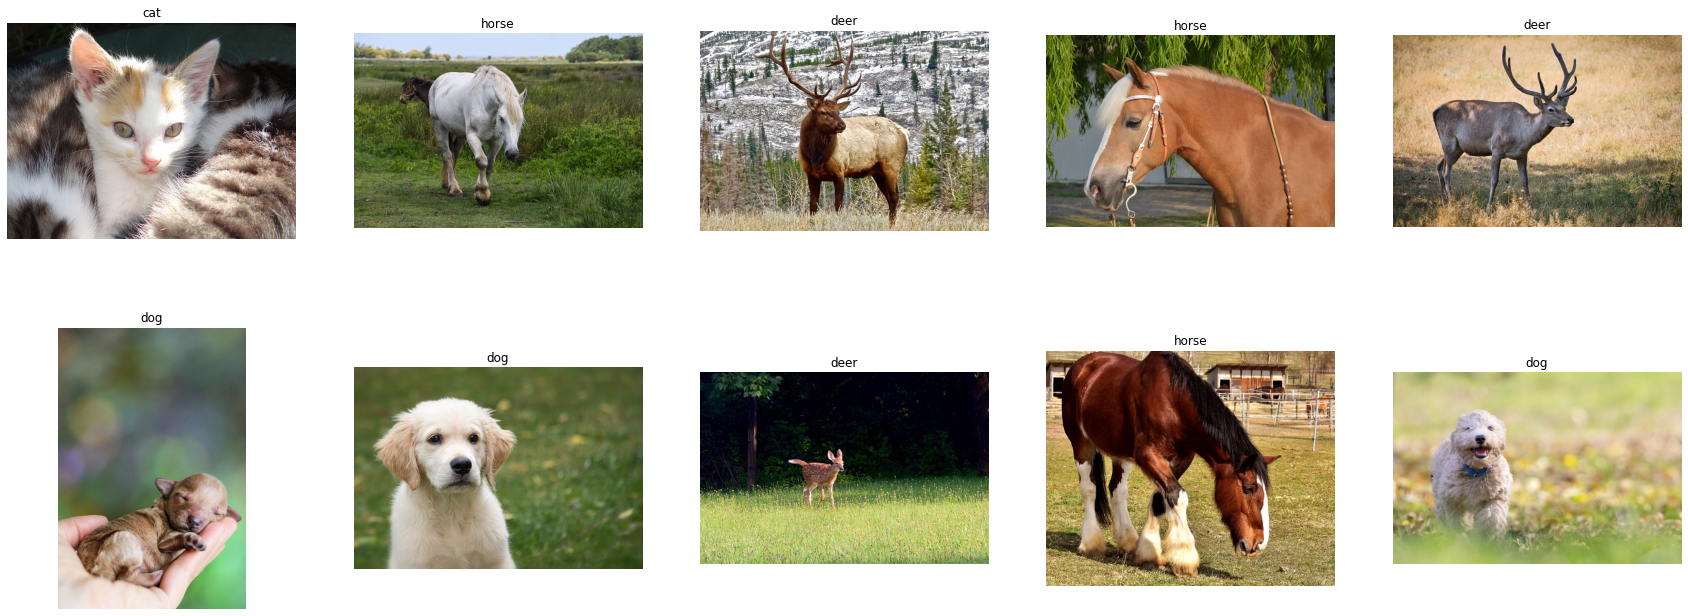

In [ ]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30)) # menampilkan foto pada datyaset dengan dimensi 30,30
for x in range(10):
    i = random.randint(0,3)                   
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

In [ ]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

## Preparering Data

In [ ]:
train_ds = image_datagen.flow_from_directory(#menggunakan image_datagen untuk klasifikasi pengelompokan
        path+'/train',
        subset='training',
        target_size=(224 , 224),#menentukan dimensi citra 224,224
        batch_size=32)#mnentukan 32 untuk citra dalam setiap training

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


## Building The Data

In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),#menggunakan dimensi ini untuk input
                                           include_top=False,#perintah menyertakan ANN
                                           weights='imagenet') #bobot masing masing layer

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), #menggunakan learing rate 0,005 dan momentum 0,9
            loss='categorical_crossentropy', #metode yang digunakan untuk pengukuran nilai loss 
            metrics = ['accuracy']) #nilai metrik yang digunakan

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                 2

## Training & Evaluating

In [ ]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 10) # menggunakan epoch sebanyak 10

Epoch 1/10
70/70 [==============================] - 712s 10s/step - loss: 0.8767 - accuracy: 0.6737 - val_loss: 0.4885 - val_accuracy: 0.8643
Epoch 2/10
70/70 [==============================] - 626s 9s/step - loss: 0.3378 - accuracy: 0.9080 - val_loss: 0.3069 - val_accuracy: 0.9089
Epoch 3/10
70/70 [==============================] - 565s 8s/step - loss: 0.2330 - accuracy: 0.9353 - val_loss: 0.2400 - val_accuracy: 0.9304
Epoch 4/10
70/70 [==============================] - 568s 8s/step - loss: 0.1745 - accuracy: 0.9496 - val_loss: 0.2076 - val_accuracy: 0.9321
Epoch 5/10
70/70 [==============================] - 587s 8s/step - loss: 0.1570 - accuracy: 0.9500 - val_loss: 0.1974 - val_accuracy: 0.9286
Epoch 6/10
70/70 [==============================] - 573s 8s/step - loss: 0.1315 - accuracy: 0.9589 - val_loss: 0.1681 - val_accuracy: 0.9375
Epoch 7/10
70/70 [==============================] - 572s 8s/step - loss: 0.0973 - accuracy: 0.9710 - val_loss: 0.1680 - val_accuracy: 0.9482
Epoch 8/10
7

18/18 [==============================] - 33s 2s/step - loss: 0.1480 - accuracy: 0.9536


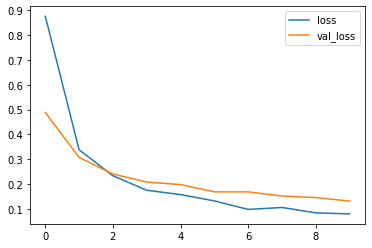

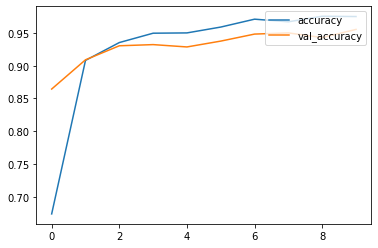

In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

didapat nilai akurasi sebesar 0.9536 atau 95% 